--------------------------------------------------------------
# **HR Employee Attrition Prediction**
--------------------------------------------------------------

---------------------
## **Context**
---------------------

McCurr Healthcare Consultancy is an MNC that has thousands of employees spread out across the globe. The company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources is spent on retaining existing employees through various initiatives. The Head of People Operations wants to bring down the cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition. As a recently hired Data Scientist in the People Operations Department, you have been asked to identify patterns in characteristics of employees who leave the organization. Also, you have to use this information to predict if an employee is at risk of attrition. This information will be used to target them with incentives.

----------------------
## **Objective**  
----------------------

* To identify the different factors that drive attrition
* To build a model to predict if an employee will attrite or not

------------------------------------
## **Dataset Description**
------------------------------------

The data contains information on employees' demographic details, work-related metrics, and attrition flag.

* **EmployeeNumber** - Unique Employee Identifier
* **Attrition** - Did the employee attrite or not?
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Data description not available**
* **Department** - Employee's Department
* **DistanceFromHome** - Distance from work to home (in KM)
* **Education** - Employee's Education. 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Data description not available
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly Salary
* **MonthlyRate** - Data description not available
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Whether the employee is over 18 years of age?
* **OverTime** - Whether the employee is doing overtime?
* **PercentSalaryHike** - The percentage increase in the salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

**In the real world, you will not find definitions for some of your variables. It is the part of the analysis to figure out what they might mean**.

## **Importing the required libraries and overview of the dataset**

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Note: The first section of the notebook is the section that has been covered in the previous case studies. For this discussion, this part can be skipped and we can directly refer to this **<a href = #link1>summary</a>** of data cleaning steps and observations from EDA.


### **Loading the dataset**

In [3]:
# Reading the dataset
df = pd.read_excel('HR_Employee_Attrition_Dataset.xlsx')

In [4]:
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


### **Checking the info of the data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

**Observations:**

- There are **2940 observations and 34 columns** in the data.
- All the column have 2940 non-null values, i.e., there are **no missing values** in the data.

**Let's check the number of unique values in each column.** 

In [6]:
# Checking the number of unique values in each column
df.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

**Observations:**

- Employee number is an identifier which is unique for each employee. We can drop this column as it would not add any value to our analysis.
- Over18 and StandardHours have only 1 unique value. We can drop these columns as they will not add any value to our analysis.
- On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

Let's drop the columns mentioned above and define lists for numerical and categorical columns to explore them separately.

In [7]:
# Dropping the columns 
df = df.drop(['EmployeeNumber', 'Over18', 'StandardHours'], axis = 1)

In [8]:
# Creating numerical columns
num_cols = ['DailyRate', 'Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears',
          'YearsAtCompany', 'NumCompaniesWorked', 'HourlyRate',
          'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TrainingTimesLastYear']

# Creating categorical variables 
cat_cols = ['Attrition', 'OverTime', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'JobSatisfaction', 
            'EnvironmentSatisfaction', 'WorkLifeBalance', 'StockOptionLevel', 'Gender', 'PerformanceRating', 'JobInvolvement',
            'JobLevel', 'JobRole', 'MaritalStatus', 'RelationshipSatisfaction']

## Exploratory Data Analysis

### **Univariate analysis of numerical columns**

In [9]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,2940.0,802.485714,403.440447,102.0,465.0,802.0,1157.0,1499.0
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
MonthlyIncome,2940.0,6502.931293,4707.155770,1009.0,2911.0,4919.0,8380.0,19999.0
MonthlyRate,2940.0,14313.103401,7116.575021,2094.0,8045.0,14235.5,20462.0,26999.0
PercentSalaryHike,2940.0,15.209524,3.659315,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,2940.0,11.279592,7.779458,0.0,6.0,10.0,15.0,40.0
YearsAtCompany,2940.0,7.008163,6.125483,0.0,3.0,5.0,9.0,40.0
NumCompaniesWorked,2940.0,2.693197,2.497584,0.0,1.0,2.0,4.0,9.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.0,66.0,84.0,100.0


**Observations:**

- **Average employee age is around 37 years**. It has a high range, from 18 years to 60, indicating good age diversity in the organization.
- **At least 50% of the employees live within a 7 KM radius** of the organization. However, there are some extreme values, given that the maximum value is 29 km.
- **The average monthly income of an employee is USD 6500.** It has a high range of values from 1K-20K USD, which is to be expected for any organization's income distribution. There is a big difference between the 3rd quartile value (around USD 8400) and the maximum value (nearly USD 20000), showing that the **company's highest earners have a disproportionately large income** in comparison to the rest of the employees. Again, this is fairly common in most organizations.
- **The average salary hike of an employee is around 15%.** At least 50% of employees got a salary hike of 14% or less, with the maximum salary hike being 25%.
- The average number of years an employee is associated with the company is 7. 
- **On average, the number of years since an employee got a promotion is ~2.19**. The majority of employees have been promoted since the last year.

Let's explore these variables in some more depth by observing their distributions.

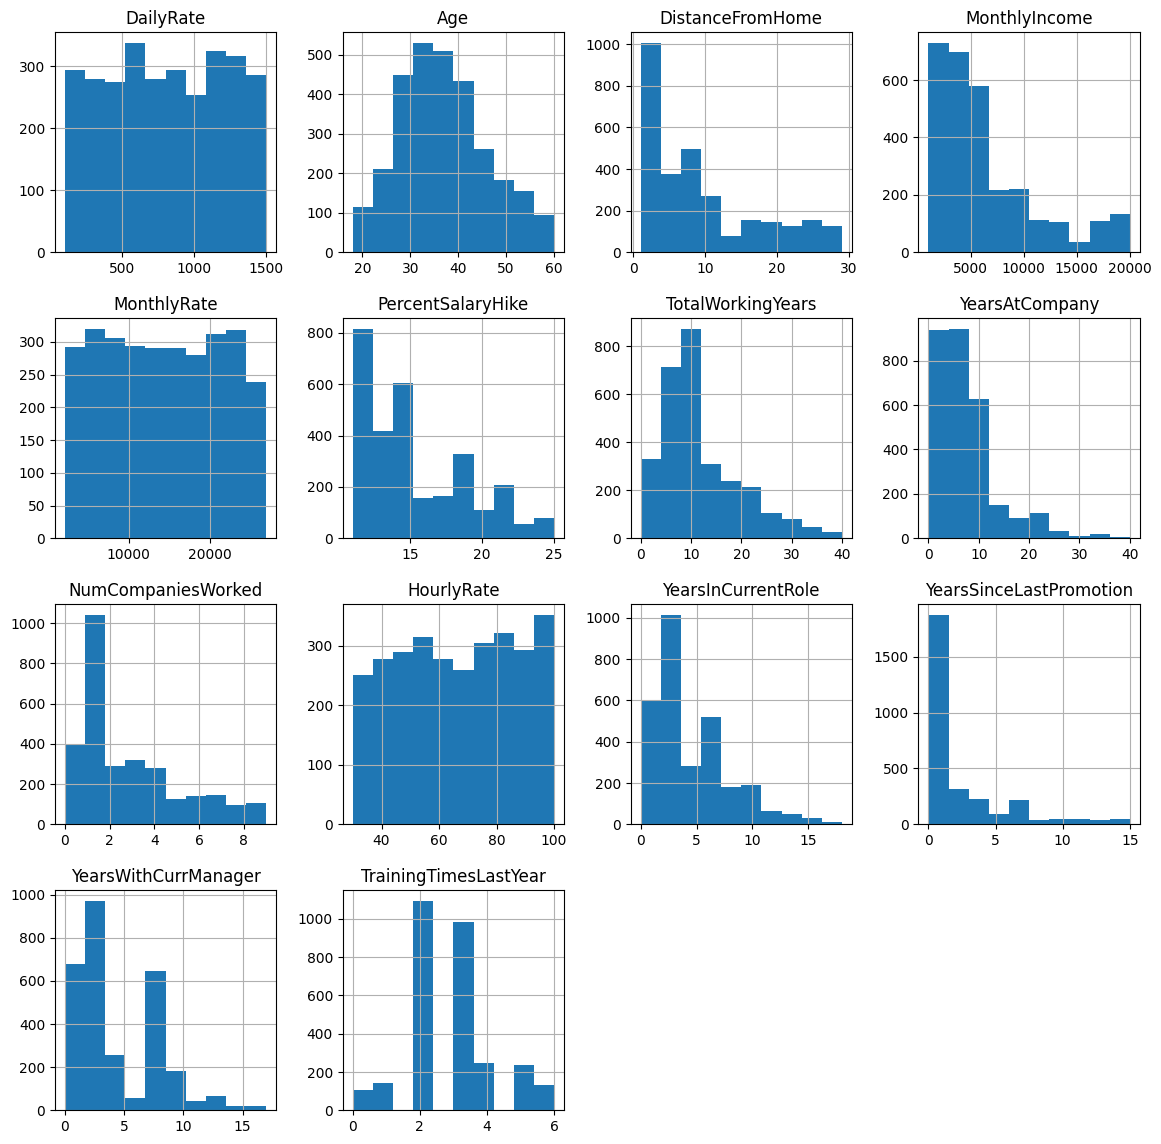

In [10]:
# Creating histograms
df[num_cols].hist(figsize = (14, 14))

plt.show()

**Observations:**

- **The age distribution is close to a normal distribution**, with the majority of employees between the ages of 25 and 50.
- **DistanceFromHome also has a right-skewed distribution**, meaning most employees live close to work but there are a few that live further away.
- **MonthlyIncome and TotalWorkingYears are skewed to the right**, indicating that the majority of workers are in entry / mid-level positions in the organization.
- **The percentage salary hike is skewed to the right**, which means employees are mostly getting lower percentage salary increaseS.
- **The YearsAtCompany variable distribution shows a good proportion of workers with 10+ years**, indicating a significant number of loyal employees at the organization. 
- **The YearsInCurrentRole distribution has three peaks at 0, 2, and 7.** There are a few employees that have even stayed in the same role for 15 years and more.
- **The YearsSinceLastPromotion variable distribution indicates that some employees have not received a promotion in 10-15 years and are still working in the organization.** These employees are assumed to be high work-experience employees in upper-management roles, such as co-founders, C-suite employees, etc.
- The distributions of DailyRate, HourlyRate, and MonthlyRate appear to be uniform and do not provide much information. It could be that the daily rate refers to the income earned per extra day worked while the hourly rate could refer to the same concept applied for extra hours worked per day. Since these rates tend to be broadly similar for multiple employees in the same department, that explains the uniform distribution they show.

### **Univariate analysis for categorical variables**

In [11]:
for i in cat_cols:
    print(df[i].value_counts(normalize = True))
    
    print('*' * 40)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64
****************************************
No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64
****************************************
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64
****************************************
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64
****************************************
3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: Education, dtype: float64
****************************************
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64
****************************************
4    0.312245
3    0.300680
1    0.196599
2    0.

**Observations:**

- **The employee attrition rate is 16%.**
- **Around 28% of the employees are working overtime.** This number appears to be on the higher side and might indicate a stressed employee's work-life.
- 71% of the employees have traveled rarely, while around 19% have to travel frequently.
- Around 73% of the employees come from an educational background in the Life Sciences and Medical fields. 
- Over 65% of employees work in the Research & Development department of the organization.
- **Nearly 40% of the employees have low (1) or medium (2) job satisfaction** and environment satisfaction in the organization, indicating that the morale of the company appears to be somewhat low.
- **Over 30% of the employees show low (1) to medium (2) job involvement.** 
- Over 80% of the employees either have none or very less stock options. 
- **In terms of performance ratings, none of the employees have been rated lower than 3 (excellent).** About 85% of employees have a performance rating equal to 3 (excellent), while the remaining have a rating of 4 (outstanding). This could either mean that the majority of employees are top performers, or the more likely scenario is that the organization could be highly lenient with its performance appraisal process.

### **Bivariate and Multivariate analysis**

**We have analyzed different categorical and numerical variables. Let's now check how does attrition rate is related with other categorical variables**

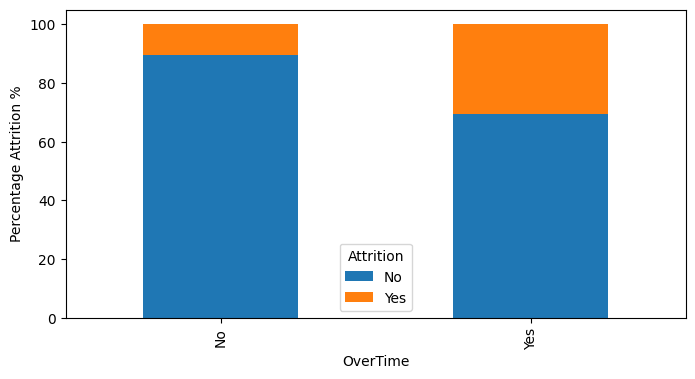

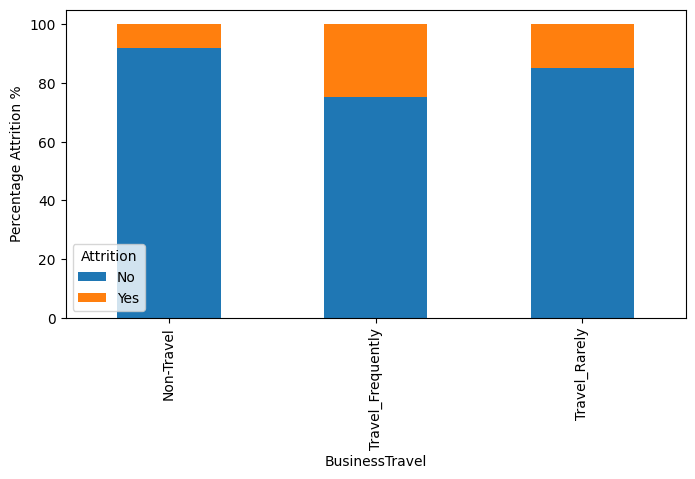

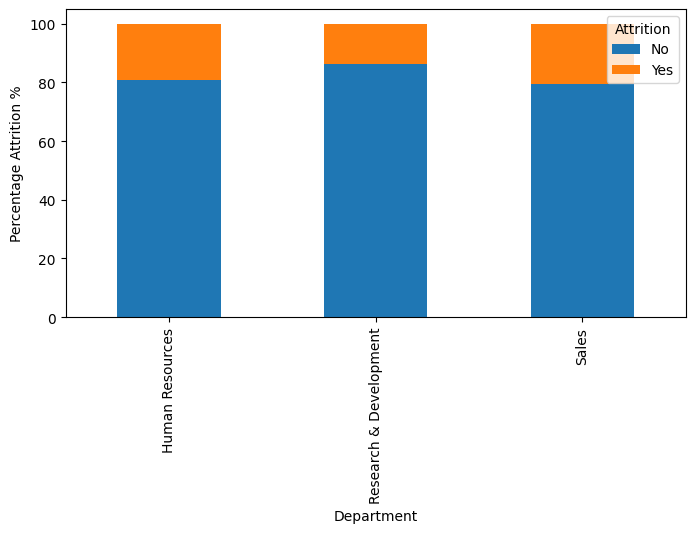

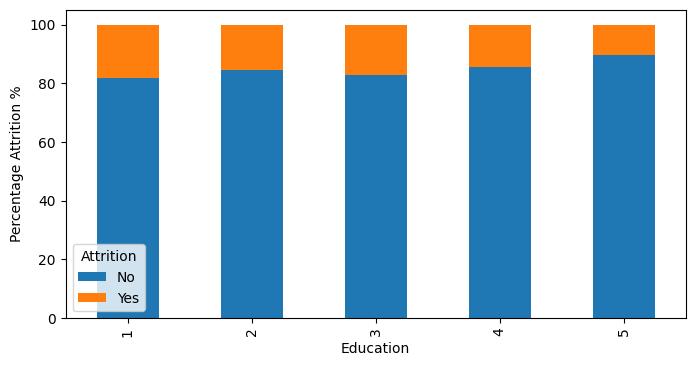

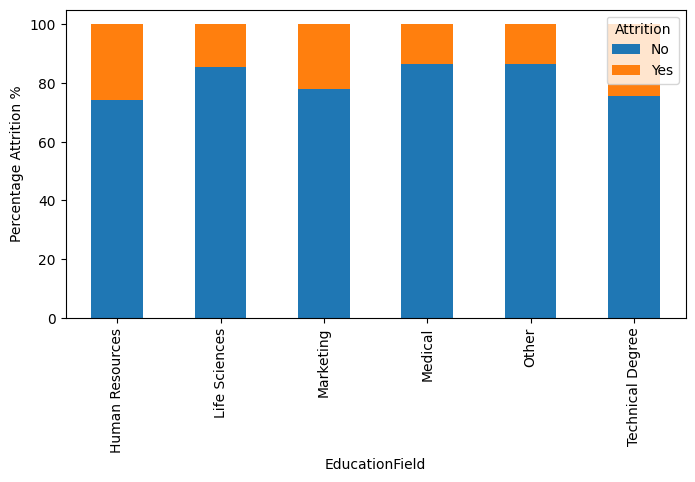

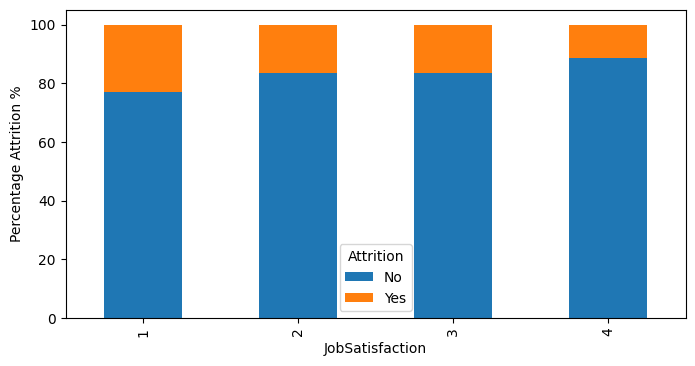

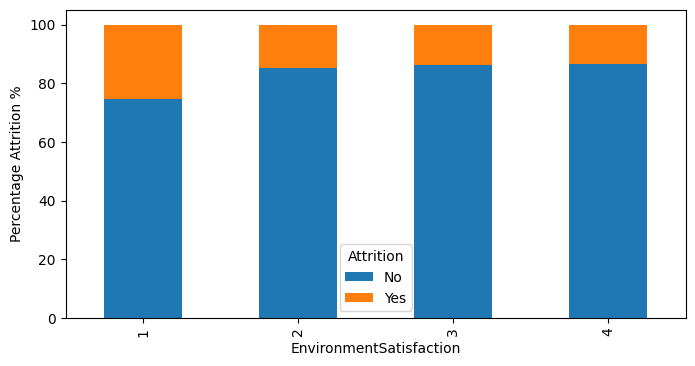

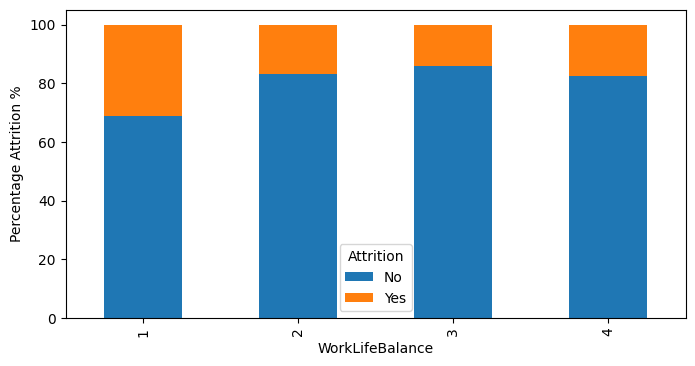

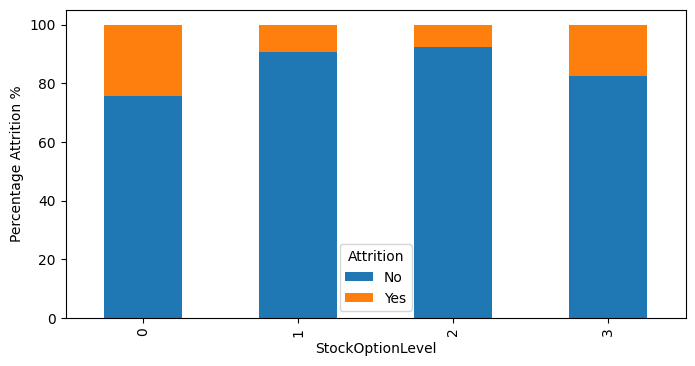

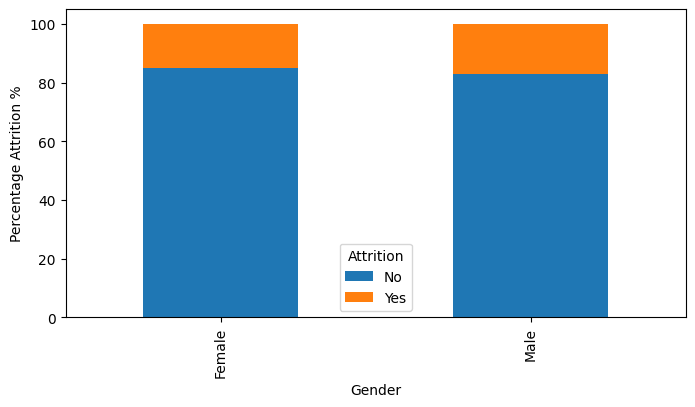

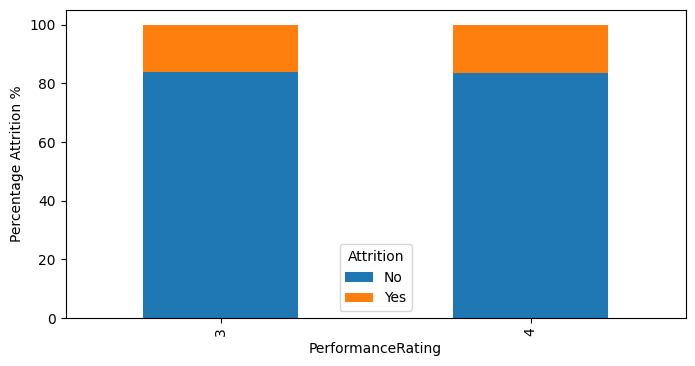

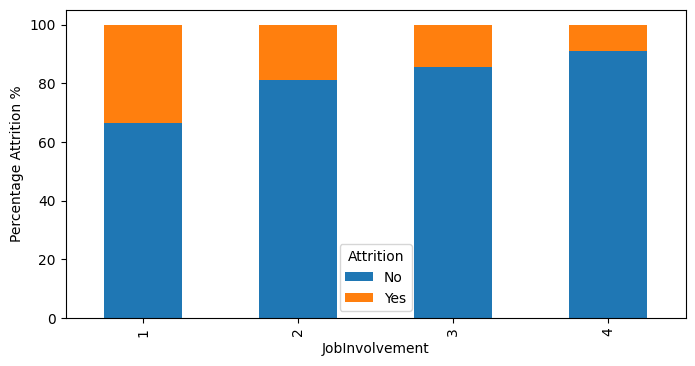

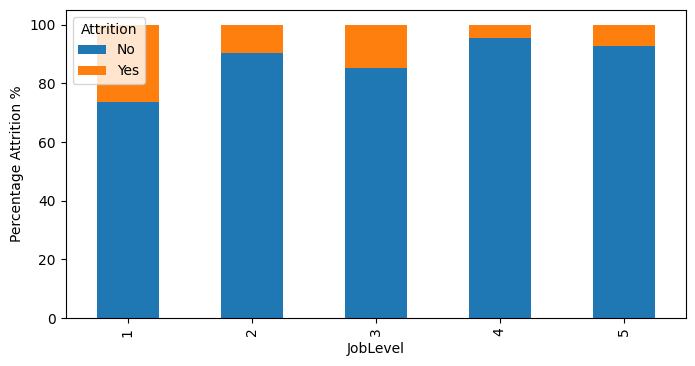

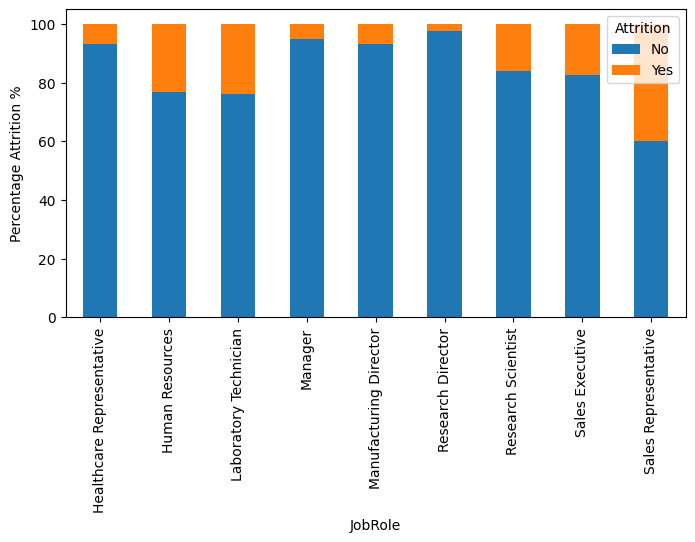

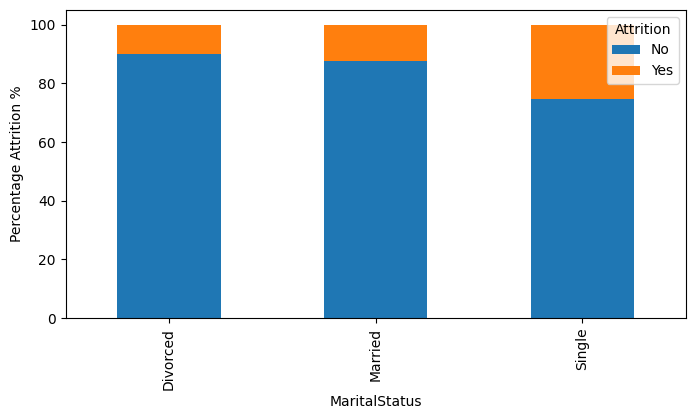

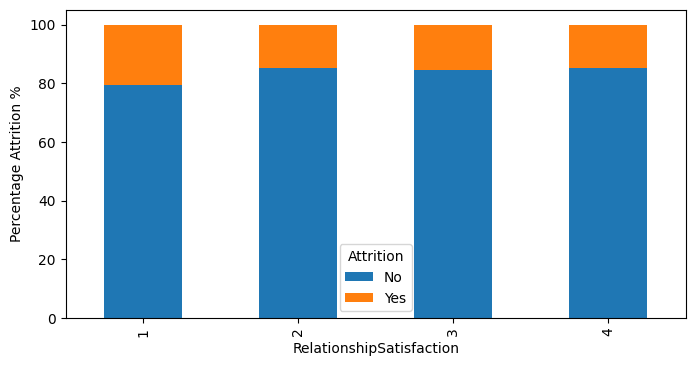

In [12]:
for i in cat_cols:
    if i != 'Attrition':
        (pd.crosstab(df[i], df['Attrition'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8, 4), stacked = True)
        plt.ylabel('Percentage Attrition %')

**Observations:**
    
- **Employees working overtime have more than a 30% chance of attrition**, which is very high compared to the 10% chance of attrition for employees who do not work extra hours.
- As seen earlier, the majority of employees work for the R&D department. The chance of attrition there is ~15%
- **Employees working as sales representatives have an attrition rate of around 40%** while HRs and Technicians have an attrition rate of around 25%. The sales and HR departments have higher attrition rates in comparison to an academic department like Research & Development, an observation that makes intuitive sense keeping in mind the differences in those job profiles. The high-pressure and incentive-based nature of Sales and Marketing roles may be contributing to their higher attrition rates.
- **The lower the employee's job involvement, the higher their attrition chances appear to be, with 1-rated JobInvolvement employees attriting at 35%.** The reason for this could be that employees with lower job involvement might feel left out or less valued and have already started to explore new options, leading to a higher attrition rate.
- **Employees at a lower job level also attrite more,** with 1-rated JobLevel employees showing a nearly 25% chance of attrition. These may be young employees who tend to explore more options in the initial stages of their careers. 
- **A low work-life balance rating leads employees to attrite**; ~30% of those in the 1-rated category show attrition.

**Let's check the relationship between attrition and Numerical variables**

In [13]:
# The mean of numerical variables grouped by attrition
df.groupby(['Attrition'])[num_cols].mean()

,DailyRate,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,NumCompaniesWorked,HourlyRate,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear
Attrition,,,,,,,,,,,,,,
No,812.504461,37.561233,8.915653,6832.739659,14265.779400,15.231144,11.862936,7.369019,2.645580,65.952149,4.484185,2.234388,4.367397,2.832928
Yes,750.362869,33.607595,10.632911,4787.092827,14559.308017,15.097046,8.244726,5.130802,2.940928,65.573840,2.902954,1.945148,2.852321,2.624473


**Observations:**

- **Employees attriting the company have a nearly 30% lower average income and 30% lesser work experience than those who are not.** These could be the employees looking to explore new options and/or increase their salary with a company switch. 
- **Employees showing attrition also tend to live 16% further from the office than those who are not**. The longer commute to and from work could mean they have to spend more time/money every day, and this could be leading to job dissatisfaction and wanting to leave the organization.

**We have found out what kind of employees are leaving the company more.**

### **Let's check the relationship between different numerical variables**

<AxesSubplot:>

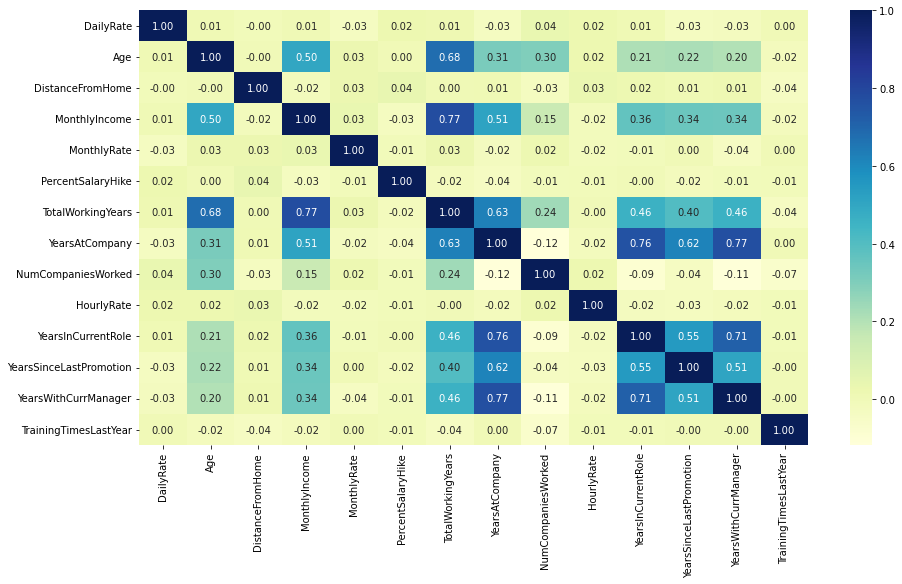

In [13]:
# Plotting the correlation between numerical variables
plt.figure(figsize = (15, 8))

sns.heatmap(df[num_cols].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')

**Observations:**

- **Total work experience, monthly income, years at the company, and years with the current managers are highly correlated with each other, and with employee age** which is easy to understand as these variables show an increase with age for most employees. 
- Years at the company and years in the current role are correlated with years since the last promotion which means that the company is not giving promotions at the right time.

### <a id='link1'>Summary of EDA</a>

**Data Description:**

* There are **2940 observations and 34 columns** in the data.
* All the columns have 2940 non-null values, i.e., **there are no missing values** in the data.
* An **employee number is an identifier** that is unique for each employee. We can **drop this column** as it would not add any value to our analysis.
* **Over18 and StandardHours have only 1 unique value. We can drop these columns** as they will not add any value to our analysis.
* On the basis of the number of unique values in each column and the data description, we can **identify the continuous and categorical columns** in the data.

**Data Cleaning:**

* **The independent variables in this dataset have different scales**. When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. **This will impact the performance of our machine learning algorithm**, and we do not want our algorithm to be biased towards one feature.
* The solution to this issue is **Feature Scaling**, i.e., scaling the dataset so as to give every transformed variable a comparable scale.
* In this problem, we will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score. It standardizes features by subtracting the mean and scaling it to have unit variance.


**Observations from EDA:**

* The average employee age is around 37 years. It has a high range, from 18 years to 60, indicating good age diversity in the organization.
* At least 50% of the employees live within a 7 KM radius of the organization. However, there are some extreme values, given that the maximum value is 29 km.
* The average monthly income of an employee is USD 6500. It has a high range of values from 1K-20K USD, which is to be expected for any organization's income distribution. There is a big difference between the 3rd quartile value (around USD 8400) and the maximum value (nearly USD 20000), showing that the company's highest earners have a disproportionately large income in comparison to the rest of the employees. Again, this is fairly common in most organizations.
* The average salary hike of an employee is around 15%. At least 50% of employees got a salary hike of 14% or less, with the maximum salary hike being 25%.
* The average number of years an employee is associated with the company is 7.
* On average, the number of years since an employee got a promotion is ~2.19. The majority of employees have been promoted since the last year.
* The age distribution is close to a normal distribution, with the majority of employees between the ages of 25 and 50.
* DistanceFromHome also has a right-skewed distribution, meaning most employees live close to work but there are a few that live further away.
* MonthlyIncome and TotalWorkingYears are skewed to the right, indicating that the majority of workers are in entry / mid-level positions in the organization.
* The percentage salary hike is skewed to the right, which means employees are mostly getting lower percentage salary increases.
* The YearsAtCompany variable distribution shows a good proportion of workers with 10+ years, indicating a significant number of loyal employees at the organization.
* The YearsInCurrentRole distribution has three peaks at 0, 2, and 7. There are a few employees that have ever stayed in the same role for 15 years and more.
* The YearsSinceLastPromotion variable distribution indicates that some employees have not received a promotion in 10-15 years and are still working in the organization. These employees are assumed to be high work-experience employees in upper-management roles, such as co-founders, C-suite employees, etc.
* The distributions of DailyRate, HourlyRate, and MonthlyRate appear to be uniform and do not provide much information. It could be that the daily rate refers to the income earned per extra day worked while the hourly rate could refer to the same concept applied for extra hours worked per day. Since these rates tend to be broadly similar for multiple employees in the same department, that explains the uniform distribution they show.
* The employee attrition rate is 16%.
* Around 28% of the employees are working overtime. This number appears to be on the higher side and might indicate a stressed employee's work-life. Employees working overtime have more than a 30% chance of attrition, which is very high compared to the 10% chance of attrition for employees who do not work extra hours.
* 71% of the employees have traveled rarely, while around 19% have to travel frequently.
* Around 73% of the employees come from an educational background in the Life Sciences and Medical fields.
* Over 65% of employees work in the Research & Development department of the organization. The chance of attrition there is ~15%.
* Nearly 40% of the employees have low (1) or medium (2) job satisfaction and environment satisfaction in the organization, indicating that the morale of the company appears to be somewhat low.
* Over 30% of the employees show low (1) to medium (2) job involvement.
* Over 80% of the employees either have none or very less stock options.
* In terms of performance ratings, none of the employees have been rated lower than 3 (excellent). About 85% of employees have a performance rating equal to 3 (excellent), while the remaining have a rating of 4 (outstanding). This could either mean that the majority of employees are top performers, or the more likely scenario is that the organization could be highly lenient with its performance appraisal process.
* Employees working as sales representatives have an attrition rate of around 40% while HRs and Technicians have an attrition rate of around 25%. The sales and HR departments have higher attrition rates in comparison to an academic department like Research & Development, an observation that makes intuitive sense keeping in mind the differences in those job profiles. The high-pressure and incentive-based nature of Sales and Marketing roles may be contributing to their higher attrition rates.
* The lower the employee's job involvement, the higher their attrition chances appear to be, with 1-rated JobInvolvement employees attriting at 35%. The reason for this could be that employees with lower job involvement might feel left out or less valued and have already started to explore new options, leading to a higher attrition rate.
* Employees at a lower job level also attrite more, with 1-rated JobLevel employees showing a nearly 25% chance of attrition. These may be young employees who tend to explore more options in the initial stages of their careers.
* A low work-life balance rating leads employees to attrite; ~30% of those in the 1-rated category show attrition.
* Employees attriting the company have a nearly 30% lower average income and 30% lesser work experience than those who are not. These could be the employees looking to explore new options and/or increase their salary with a company switch.
* Employees showing attrition also tend to live 16% further from the office than those who are not. The longer commute to and from work could mean they have to spend more time/money every day, and this could be leading to job dissatisfaction and wanting to leave the organization.
* Total work experience, monthly income, years at the company, and years with the current managers are highly correlated with each other, and with employee age which is easy to understand as these variables show an increase with age for most employees.
* Years at the company and years in the current role are correlated with years since the last promotion which means that the company is not giving promotions at the right time.

**Now that we have explored our data, let's build the model**

## **Model Building - Approach**

1. Prepare the data for modeling.
2. Partition the data into train and test sets.
3. Build the model on the train data.
4. Tune the model if required.
5. Test the data on the test set.

###  **Preparing data for modeling**

**Creating dummy variables for categorical Variables**

In [14]:
# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus']

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)      

# Mapping overtime and attrition
dict_OverTime = {'Yes': 1, 'No': 0}
dict_attrition = {'Yes': 1, 'No': 0}

df['OverTime'] = df.OverTime.map(dict_OverTime)
df['Attrition'] = df.Attrition.map(dict_attrition)

**Separating the independent variables (X) and the dependent variable (Y)**

In [15]:
# Separating the target variable and other variables
Y = df.Attrition
X = df.drop(columns = ['Attrition'])

### **Scaling the data**

The independent variables in this dataset have different scales. When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature. 

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

In this problem, we will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score.

It standardizes features by subtracting the mean and scaling it to have unit variance.

The standard score of sample x is calculated as:

**z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

In [16]:
# Scaling the data
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

### **Splitting the data into 70% train and 30% test sets**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance, there could be several times more negative samples than positive samples. In such cases, it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [17]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1, stratify = Y)

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**

1. Predicting an employee will attrite when the employee doesn't attrite
2. Predicting an employee will not attrite when the employee actually attrites

**Which case is more important?**

* **Predicting that the employee will not attrite but the employee attrites**, i.e., losing out on a valuable employee or asset. This would be considered a major miss for any employee attrition predictor and is hence the more important case of wrong predictions.

**How to reduce this loss i.e the need to reduce False Negatives?**
* **The company would want the Recall to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing the Recall (minimizing the false negatives) or, in other words, identifying the true positives (i.e. Class 1) very well, so that the company can provide incentives to control the attrition rate especially, for top-performers. This would help in optimizing the overall project cost towards retaining the best talent.

Also, let's create a function to calculate and print the classification report and the confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [18]:
def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Attrite', 'Attrite'], yticklabels = ['Not Attrite', 'Attrite'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')
    
    plt.show()

### **Building the model**

We will be building 2 different models:
- **Logistic Regression**
- **K-Nearest Neighbors (K-NN)**

### **Logistic Regression**

- Logistic Regression is a supervised learning algorithm, generally used for **binary classification problems**, i.e., where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event Y, given some features X as:

                                          P(Y)=1/(1 + exp(-X))

In [19]:
# Fitting the logistic regression model
lg = LogisticRegression()

lg.fit(x_train,y_train)

LogisticRegression()

**Checking the model performance**

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1726
           1       0.81      0.50      0.62       332

    accuracy                           0.90      2058
   macro avg       0.86      0.74      0.78      2058
weighted avg       0.89      0.90      0.89      2058



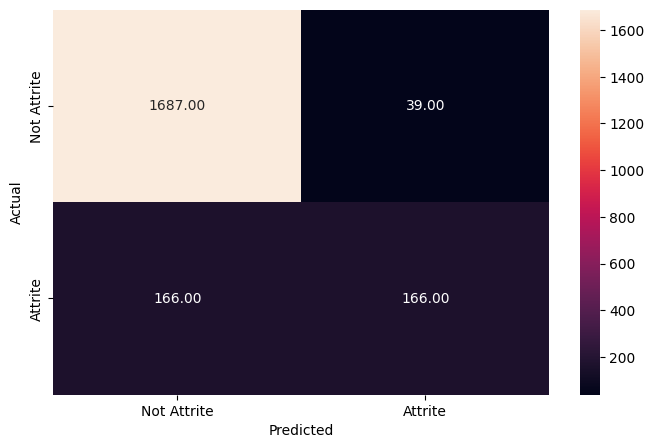

In [20]:
# Checking the performance on the training data
y_pred_train = lg.predict(x_train)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       740
           1       0.76      0.46      0.58       142

    accuracy                           0.89       882
   macro avg       0.83      0.72      0.76       882
weighted avg       0.88      0.89      0.88       882



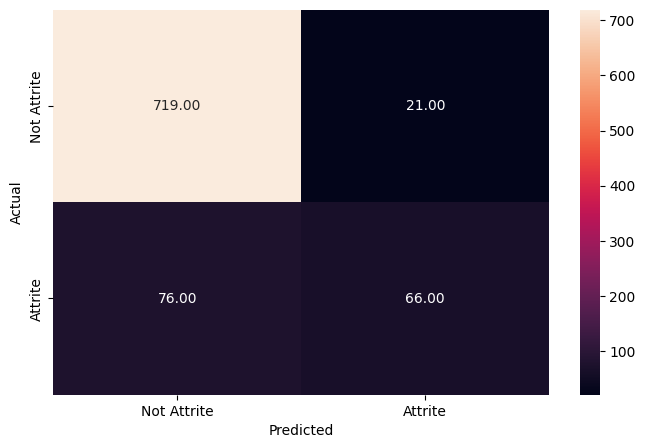

In [21]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(x_test)
metrics_score(y_test, y_pred_test)

**Observations:**
- **We are getting an accuracy of about 90%** on the train and the test datasets.
- However, **the recall for this model is only around 50% for class 1 on the train data and 46% on the test data.**
- As the recall is low, **this model will not perform well** in differentiating out employees who have a high chance of attriting the company, meaning it will eventually not help in reducing the attrition rate. 
- As we can see from the Confusion Matrix, **this model is not good at identifying employees who are at risk of attrition.**

**Let's check the coefficients and find which variables are leading to attrition and which can help to reduce the attrition.**

In [22]:
# Printing the coefficients of logistic regression
cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
OverTime,0.958034
BusinessTravel_Travel_Frequently,0.716046
MaritalStatus_Single,0.618145
YearsSinceLastPromotion,0.552935
YearsAtCompany,0.523238
NumCompaniesWorked,0.501137
Department_Sales,0.483346
Department_Research & Development,0.482820
BusinessTravel_Travel_Rarely,0.441384
DistanceFromHome,0.384346


**Observations:**


**Features which positively affect on the attrition rate are:**
- OverTime	
- BusinessTravel_Travel_Frequently	
- Department_Research & Development	
- JobRole_Sales Executive	
- MaritalStatus_Single	
- Department_Sales	
- NumCompaniesWorked	
- YearsSinceLastPromotion
- JobLevel_5	
- BusinessTravel_Travel_Rarely
- DistanceFromHome
- YearsAtCompany	
- JobRole_Human Resources	
- JobRole_Sales Representative

**Features which negatively affect on the attrition rate are:**
- MonthlyIncome	
- JobInvolvement_3	
- JobLevel_2	
- EnvironmentSatisfaction_4	
- JobInvolvement_4	
- JobInvolvement_2	
- EnvironmentSatisfaction_3	
- EducationField_Life Sciences	
- EnvironmentSatisfaction_2	
- YearsWithCurrManager	
- JobRole_Research Director	
- TotalWorkingYears	
- JobSatisfaction	

**The coefficients that positively and negatively affect the attrition rate seem to be quite similar for logistic regression and LDA. This means they are capturing the same pattern and giving nearly the same conclusions from the dataset.**

The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into odds by taking its exponential.

In [23]:
odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

,odds
OverTime,2.606567
BusinessTravel_Travel_Frequently,2.046326
MaritalStatus_Single,1.855483
YearsSinceLastPromotion,1.738348
YearsAtCompany,1.687483
NumCompaniesWorked,1.650597
Department_Sales,1.621491
Department_Research & Development,1.620638
BusinessTravel_Travel_Rarely,1.554858
DistanceFromHome,1.468653


**Observations:**

- The odds of an employee working overtime to attrite are **2.6 times** the odds of one who is not working overtime, probably because working overtime is not sustainable for an extended duration for any employee, and may lead to burnout and job dissatisfaction.
- The odds of an employee traveling frequently to attrite are **double** the odds of an employee who doesn't travel as often.
- The odds of single employees attriting are about **1.85 times (85% higher than)** the odds of an employee with another marital status.

**The Precision-Recall Curve for Logistic Regression**

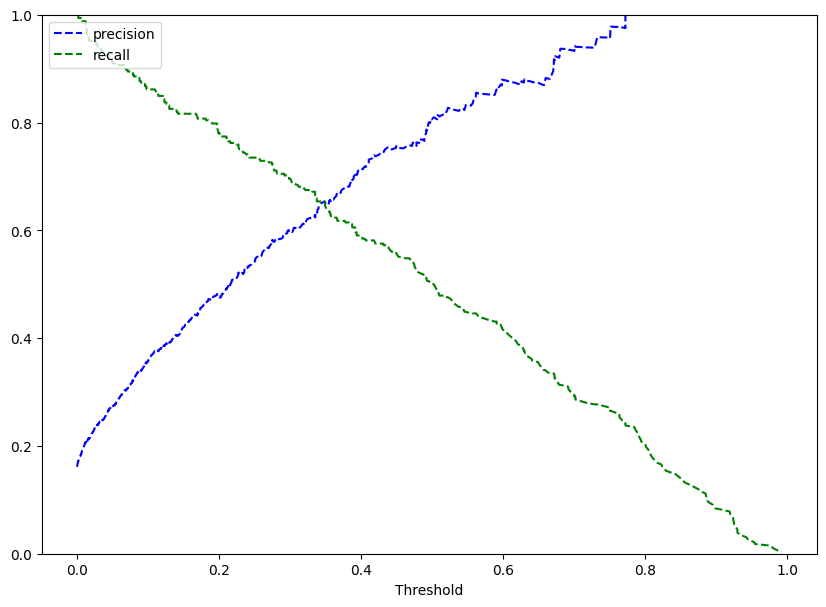

In [27]:
y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observation:**
- We can see that the precision and the recall are balanced for a threshold of about **0.35**.

**Let's find out the performance of the model at this threshold.**

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1726
           1       0.65      0.64      0.64       332

    accuracy                           0.89      2058
   macro avg       0.79      0.79      0.79      2058
weighted avg       0.89      0.89      0.89      2058



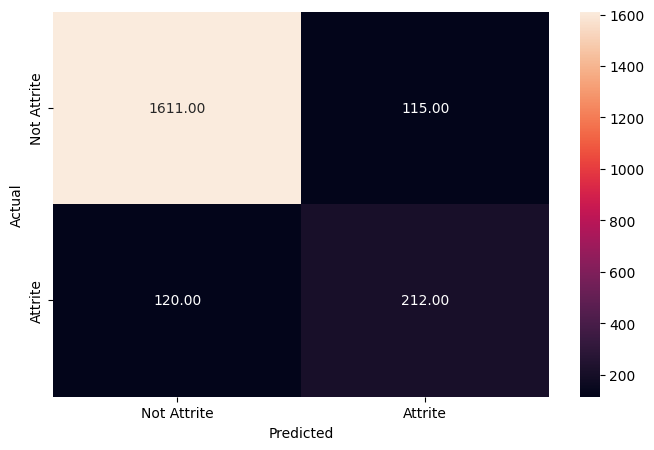

In [28]:
optimal_threshold1 = .35

y_pred_train = lg.predict_proba(x_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

**Observations:**

- **The model performance has improved. The recall has increased significantly for class 1.**
- Let's check the performance on the test data.

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       740
           1       0.62      0.63      0.63       142

    accuracy                           0.88       882
   macro avg       0.78      0.78      0.78       882
weighted avg       0.88      0.88      0.88       882



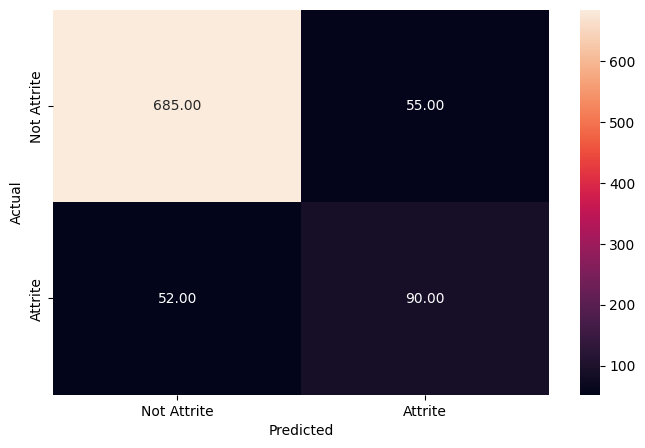

In [29]:
optimal_threshold1 = .35

y_pred_test = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

**Observations:**

- The model is giving a **similar performance on the test and the train datasets**, i.e., the model is giving a generalized performance.
- **The recall of the test data has increased** while at the same time, the precision has decreased slightly, which is to be expected while adjusting the threshold.
- The average recall and precision for the model are good but let's see if we can get even better performance using other algorithms. 

### **K-Nearest Neighbors (K-NN)**

K-NN uses features from the training data to predict the values of new data points, which means the new data point will be assigned a value based on how similar it is to the data points in the training set. 


The following steps are performed in K-NN:

- Select K
- Calculate distance (Euclidean, Manhattan, etc.)
- Find the K closest neighbors
- Take majority vote for labels

The “K” in the K-NN algorithm is the number of nearest neighbors we wish to take the vote from. Generally, K is taken to be an odd number when the number of classes is even, so as to get a majority vote. Let's say K=3. In that case, we will make a circle with the new data point as the center just as big as enclosing only the three nearest data points on the plane.

**But before actually building the model, we need to identify the value of K to be used in K-NN. We will perform the following steps for the same.**

- For every value of K (from 1 to 15), split the training set into a new train and validation sets (30 times)
- Scale the training data and the validation data
- Take the average of the error on these training and the validation sets for each value of K
- Plot the average train vs validation error for all Ks 
- Choose the optimal K from the plot where the two errors are comparable

In [27]:
knn = KNeighborsClassifier()

# We select the optimal value of K for which the error rate is the least in the validation data
# Let us loop over a few values of K to determine the optimal value of K

train_error = []

test_error = []

knn_many_split = {}

error_df_knn = pd.DataFrame()

features = X.columns

for k in range(1, 15):
    train_error = []
    
    test_error = []
    
    lista = []
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    for i in range(30):
        x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size = 0.20)
    
        # Fitting K-NN on the training data
        knn.fit(x_train_new, y_train_new)
        
        # Calculating error on the training data and the validation data
        train_error.append(1 - knn.score(x_train_new, y_train_new)) 
        
        test_error.append(1 - knn.score(x_val, y_val))
    
    lista.append(sum(train_error)/len(train_error))
    
    lista.append(sum(test_error)/len(test_error))
    
    knn_many_split[k] = lista

knn_many_split

{1: [0.0, 0.087378640776699],
 2: [0.05463750506277846, 0.14417475728155346],
 3: [0.06636289995949778, 0.16650485436893206],
 4: [0.11816524908869987, 0.15008090614886735],
 5: [0.11366950182260024, 0.15097087378640783],
 6: [0.12920210611583635, 0.15226537216828484],
 7: [0.12328878088294855, 0.14983818770226537],
 8: [0.13618874038072099, 0.15072815533980585],
 9: [0.13047792628594573, 0.14862459546925566],
 10: [0.13999594977723775, 0.14627831715210363],
 11: [0.13556095585257186, 0.14457928802588998],
 12: [0.141575536654516, 0.14911003236245957],
 13: [0.1377683272579992, 0.15129449838187708],
 14: [0.14406642365330094, 0.15792880258899678]}

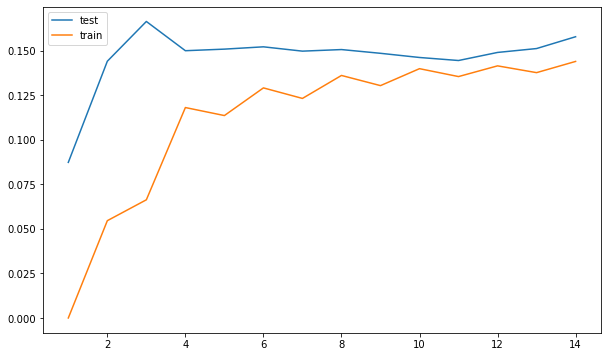

In [28]:
kltest = []

vltest = []

for k, v in knn_many_split.items():
    kltest.append(k)
    
    vltest.append(knn_many_split[k][1])

kltrain = []

vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    
    vltrain.append(knn_many_split[k][0])

# Plotting K vs Error
plt.figure(figsize = (10, 6))

plt.plot(kltest, vltest, label = 'test' )

plt.plot(kltrain, vltrain, label = 'train')

plt.legend()

plt.show()

**Observations:**
- We can see that the test error (error on the validation data) is more or less similar for K greater than or equal to 5. But the training error keeps increasing with increasing K.
- This implies that we would get a lower train and test error if we choose K = 5. Also, if we choose a higher value of K, the model would get biased due to the imbalance in the dataset.
- So, let's fit the K-NN model with **K=5** on the entire training set.

In [29]:
# Define K-NN model

knn = KNeighborsClassifier(n_neighbors = 5)

In [30]:
# Fitting data to the K-NN model

knn.fit(x_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1726
           1       0.80      0.43      0.56       332

    accuracy                           0.89      2058
   macro avg       0.85      0.70      0.75      2058
weighted avg       0.88      0.89      0.88      2058



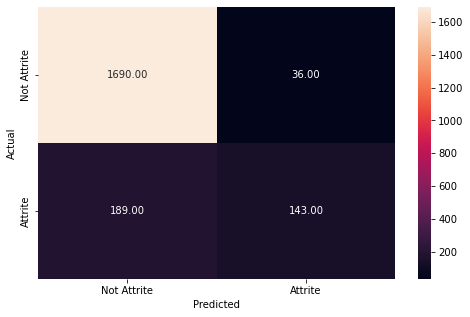

In [31]:
# Checking the performance of K-NN model on the training data
y_pred_train_knn = knn.predict(x_train)

metrics_score(y_train, y_pred_train_knn)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       740
           1       0.67      0.32      0.43       142

    accuracy                           0.87       882
   macro avg       0.78      0.64      0.68       882
weighted avg       0.85      0.87      0.84       882



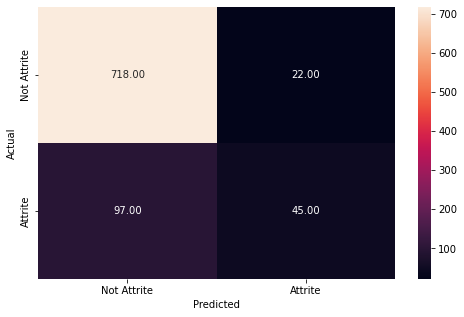

In [32]:
# Checking the performance of K-NN model on the testing data
y_pred_test_knn = knn.predict(x_test)

metrics_score(y_test, y_pred_test_knn)

**Observation:**
- The model gives a slightly better performance on the train in comparison to the test data but the **recall is not very good**. Let's see if we can improve on that.

**Let's try to fine tune this model and check if we could increase the Recall.**

### **Using GridSearchCV for Hyperparameter tuning of the model**

* Hyperparameter tuning is tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation.
* **Grid search** is a model tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

- **n_neighbors**

    - Number of neighbors to use.


- **weights={'uniform', 'distance'}**
    - uniform : uniform weights. All points in each neighborhood are weighted equally.
    - distance : weight points by the inverse of their distance. In this case, the closest neighbors of a query point will have a greater influence than neighbors that are further away.


- **p**
    - When p = 1, this is equivalent to using Manhattan_distance (L1), and Euclidean_distance (L2) is used for p = 2.

In [33]:
params_knn = {'n_neighbors': np.arange(3, 15), 'weights': ['uniform', 'distance'], 'p': [1, 2]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'recall', cv = 10)

model_knn = grid_knn.fit(x_train,y_train)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')


- We have found the best hyperparameters for the K-NN classifier. Let's use these parameters to build the new K-NN model and find the recall of that model.

In [34]:
# Fit the best estimator on the training data
knn_estimator.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00       332

    accuracy                           1.00      2058
   macro avg       1.00      1.00      1.00      2058
weighted avg       1.00      1.00      1.00      2058



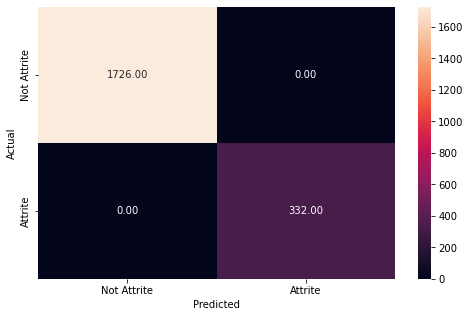

In [35]:
y_pred_train_knn_estimator = knn_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_knn_estimator)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       740
           1       0.86      0.83      0.84       142

    accuracy                           0.95       882
   macro avg       0.91      0.90      0.91       882
weighted avg       0.95      0.95      0.95       882



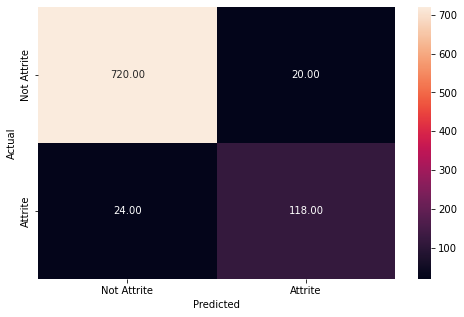

In [36]:
y_pred_test_knn_estimator = knn_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_knn_estimator)

**Observations:**

- This model seems to be overfitting but **the results have significantly improved** in comparison to previous models.
- **Test recall and precision have significantly increased** by tuning the K-NN classifier.
- This appears to be a high-performing model that the company can use to control the attrition rate. There is about an **83% chance** that the model will detect employees who are likely to leave the company, and the company can take the appropriate action.

## **Feature Importance using SHAP Library**

With the aid of a visualization tool called SHAP, or **SHapley Additive exPlanations**, a machine learning model's output can be made more understandable. By calculating the contribution of each feature to the prediction, it can be used to explain the prediction by any model. The direction of the relationship (positive or negative) between the predictive variable and the target variable is also indicated by the SHAP values. A technique called SHAP values (SHapley Additive exPlanations), which is based on cooperative game theory, is **used to make machine learning models more transparent and understandable**.

In a machine learning setting, a Shapley value is the contribution of a feature value to the difference between the actual prediction and the mean prediction.

### **Installing SHAP**

To install the SHAP library, run the below command in a Jupyter notebook and restart the kernel.

**!pip install shap**

**Note:** You only need to install the library while running the code for the first time.

In [37]:
!pip install shap

### **SHAP Barplot**

We plot the mean absolute value for each feature column as a bar chart if an **Explainer** with many samples is passed.

We determine the **mean absolute SHAP** values across all observations for each feature. Since we do not want positive and negative numbers to cancel one another out, we take the absolute values. A mean SHAP plot will allow us to visualize the aggregated SHAP values. 

SHAP value helps us quantify feature's contribution towards a prediction. SHAP value closer to zero means the feature contributes little to the prediction whereas SHAP value away from zero indicates the feature contributes more. So, **large positive/negative SHAP values are found in features that significantly affect the model's predictions.** 

In the bar plot below, each feature is represented by a separate bar.

In [38]:
# Importing the SHAP library
import shap as sh

In [39]:
# Fitting the Explainer
explainer = sh.Explainer(knn_estimator.predict, x_test)

# Calculating the SHAP values. The below code might take some time to run.
shap_values = explainer(x_test)

Permutation explainer: 883it [31:53,  2.18s/it]                                                                        


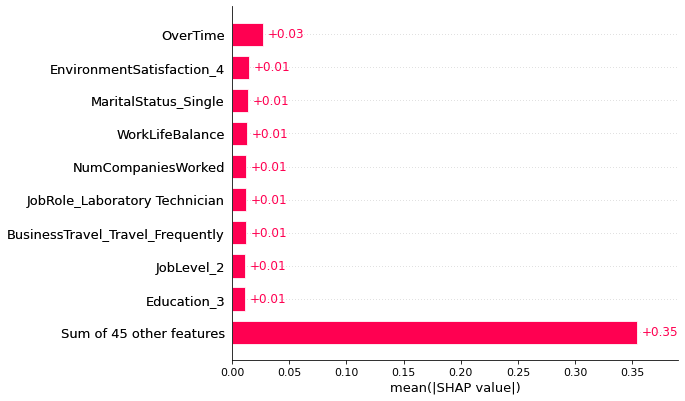

In [40]:
sh.plots.bar(shap_values)

**Note:** By default the bar plot only shows a maximum of ten bars, but this can be controlled with the **max_display parameter.**

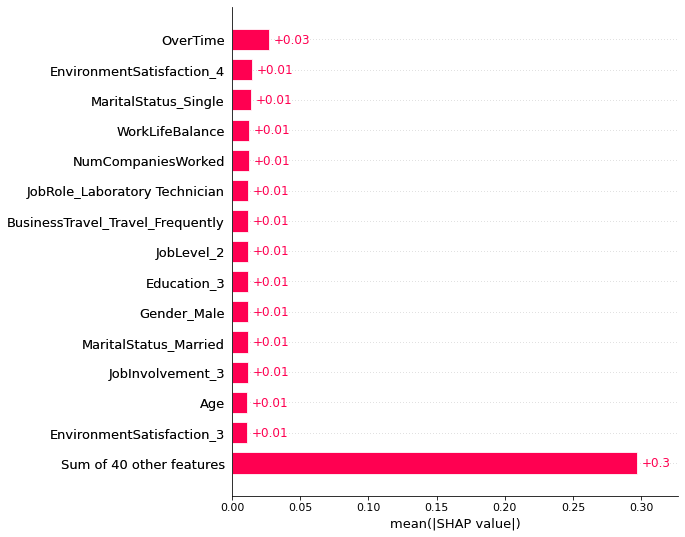

In [41]:
sh.plots.bar(shap_values, max_display=15)

**Observations:**

- The above barplot from SHAP shows that **OverTime is the most important feature for the tuned K-NN model** to predict employee attrition because we can observe that overtime had the highest mean SHAP of all the features.
- Other 13 features displayed in the barplot, like EnvironmentSatisfication_4, MartialStatus_Single, WorkLifeBalance, etc., have the mean SHAP value of 0.01, which implies that these features are equally important for the model's predictions.
- The sum of the mean SHAP value for the rest of the 4o features is 0.3. It implies that there are some features with mean SHAP value of less than 0.01.

### **Summary Plot**

The SHAP summary plot displays how each instance's (row of data) features contribute to the final prediction.

- Here, the Y-axis indicates the variable name, in order of importance from top to bottom and the X-axis is the SHAP value, which indicates the impact on the model output.
- Each dot represents a row from the original dataset.
- The color of the data shows the features values. This allows us to see the how the SHAP values changes as the feature value changes. The color map on the right helps to understand which value is low and which value is high. If a feature has boolean values, it will take two colors, and for continuous features, it can contain the whole spectrum.

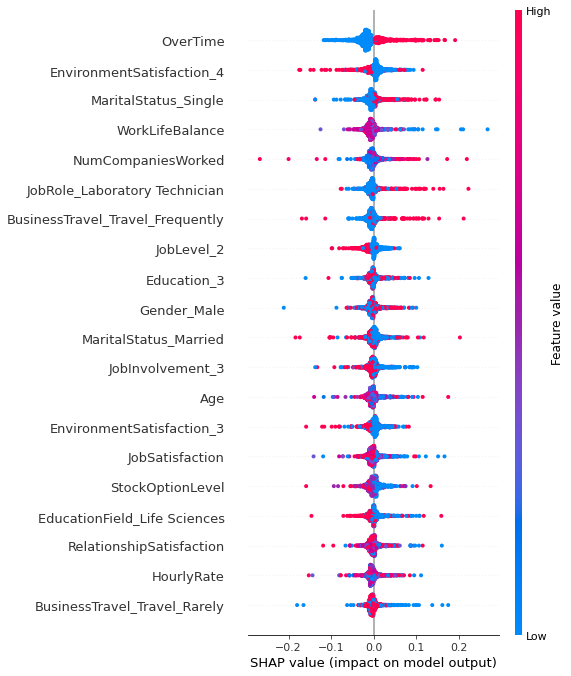

In [42]:
sh.summary_plot(shap_values)

**Observations:**
- The summary plot shows that **OverTime, MartialStatus_Single, and EnvironmentSatisfication_4** are the three most important features to predict whether an employee would attrite or not.
- We can observe that there is a positive impact on the model's output, indicated by positive SHAP value, as the value of OverTime increases, indicated by red colored dots. This implies that **employees having higher values of OverTime are more likely to attrite** (as Attrition=1 is the positive class).
- We can also observe that higher values of EnvironmentSatisfication_4, indicated by red dots, lead to a negative impact on the model's output. This implies that **employees having very high environment satisfaction (i.e. EnvironmentSatisfication_4=1) are less likely to attrite.**

### **Force Plot**

The SHAP force plot shows you exactly which feature had the most influence on the model's prediction for a **single observation.** 

The below graph explains a single prediction from the test set.

Using 2058 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


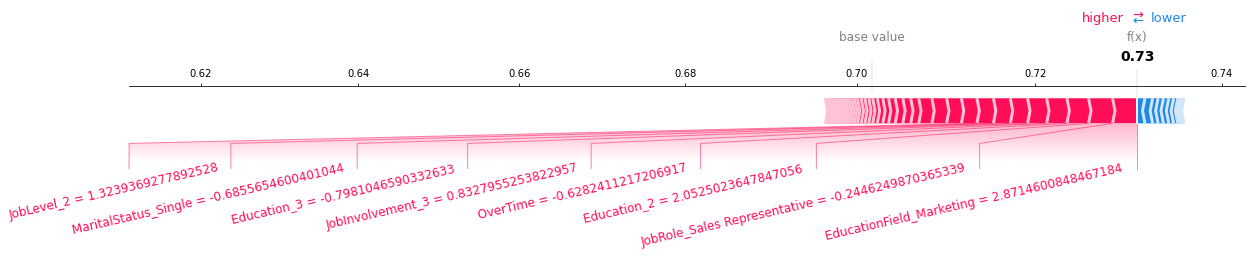

In [43]:
explainer = sh.KernelExplainer(knn.predict_proba, x_train)

shap_values1 = explainer.shap_values(x_test.iloc[0,:])

sh.force_plot(explainer.expected_value[0], shap_values1[0], x_test.iloc[0,:], matplotlib = True, text_rotation=13, link='logit')

**Observations:**

- In the plot above, the **0.73** is the model's score for this observation. Here, the model's score can also be considered as the **probability of getting model output as 1**. The higher the probability, higher the chances of employee attrition.
- The **base value of ~0.70** is the predicted probability if there would have been no features. This is the reference value that the feature contributions start from.
- The features that were important to making the prediction for this observation are shown in red and blue, with **red representing features that pushed the predicted probability higher, and blue representing features that pushed the predicted probability lower**. Features that had more of an impact on the predicted probability are located closer to the dividing boundary between red and blue, and **the size of that impact is represented by the size of the bar**.
- Here, we observe that the majority of features are pushing the model's output towards a positive prediction where the feature **EducationField_Marketing** has the highest impact. The highest absolute SHAP value of EducationField_Marketing indicates that the employee being from the Marketing department was the most significant reason for the model predicting that this employee would attrite.

## **Conclusion and Recommendations**

### **Conclusions:**

- We have tried multiple models and were **able to identify the key factors involved with high attrition** in the organization.
- The final model, **a hyperparameter-tuned K-NN classifier**, is overfitting on the training dataset, but **gives the highest recall on the training and the testing datasets.** It may be possible to further try and tune the model, and the HR department can use this model to predict whether an employee is at risk of attrition or not.

### **Recommendations:**

- We saw that **working overtime is the most important driver of attrition.** The organization should manage their work more efficiently so that employees don't have to work overtime and can manage to have a work-life balance, or failing this, the company could provide some additional incentives to employees who are working overtime to retain them.
- We observed that **approximately 40% of employees have given a poor rating on environment satisfaction**, possibly contributing to a higher attrition rate. The organization should focus on improving the culture and environment of the organization by coming up with new ideas to make the office environment more open and friendly.
- As observed, **the organization has higher attrition due to work-life balance.** The company might need to focus on giving flexible timings to employees instead making them work full-day. It can help the employees to feel less stressed and more productive in their work.
- **Frequent migration/traveling due to the job is also an important factor for attrition**. Employees traveling frequently for a greater distance due to office work are more likely to attrite. For such employees, the company could provide shuttle facilities so that the commute for such employees gets easier.
- The data and the model suggest that **lower job involvement leads to a higher likelihood of attrition**. This might be due to a lack of growth opportunities or a poor management style. A more proactive, hands-on approach may be required from the managers in the organization
- **A higher monthly income might lower the odds of an employee attriting.** The company should make sure that all its employees are compensated at least based on industry standards.
- **Young and relatively new/inexperienced employees tend to show a higher attrition rate, especially males.** The organization might be able to keep track of the problems that employees with less experience face in a better manner and come up with better ideas on how the management might help them. This may help create a healthier, more welcoming environment for younger male employees.
- The organization could come up with a revised CTC plan that includes stock options for a larger proportion of the employees to keep them motivated.

# **Optional Content**

## **Building the model**

We will be building 2 additional models:
- **Linear Discriminant Analysis (LDA)**
- **Quadratic Discriminant Analysis (QDA)**

### **Linear Discriminant Analysis**

Linear discriminant analysis (LDA) is generally used to classify patterns between two classes; however, it can be extended to classify multiple patterns. LDA assumes that all classes are linearly separable and according to this, multiple linear discrimination functions representing several hyperplanes in the feature space are created to distinguish between the classes. If there are two classes, then the LDA draws one hyperplane and projects the data onto this hyperplane in such a way as to maximize the separation of the two categories. This hyperplane is created according to two criteria considered simultaneously:

- Maximizing the distance between the means of two classes.
- Minimizing the variation between each category.

In [34]:
# Fitting the LDA model
lda = LinearDiscriminantAnalysis()

lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

**Checking Model Performance**

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1726
           1       0.80      0.52      0.63       332

    accuracy                           0.90      2058
   macro avg       0.86      0.75      0.78      2058
weighted avg       0.89      0.90      0.89      2058



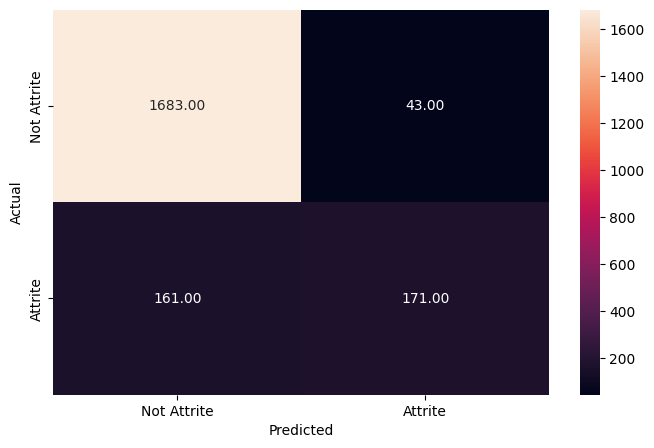

In [35]:
# Checking model performance of LDA
y_pred_train_lda = lda.predict(x_train)

metrics_score(y_train, y_pred_train_lda)

- The reported average includes the macro average which averages the unweighted mean per label, and the weighted average which averages the support-weighted mean per label.
- In classification, the class of interest is considered the positive class. Here, the class of interest is 1, i.e., identifying the employees at risk of attrition.

**Reading the confusion matrix (clockwise from top left):**

* True Negative (Actual = 0, Predicted = 0): Model predicts that an employee would not attrite and the employee does not attrite 

* False Positive (Actual = 0, Predicted = 1): Model predicts that an employee would attrite but the employee does not attrite

* True Positive (Actual = 1, Predicted = 1): Model predicts that an employee would attrite and the employee actually attrites

* False Negative (Actual = 1, Predicted = 0): Model predicts that an employee would not attrite but the employee attrites

**Observations:**

- The model is performing well in terms of accuracy.
- The recall for class 1 is quite low, which implies that this model will not perform well in differentiating the employees who have a high chance of leaving the company, and hence this model would not help reduce the attrition rate. 
- The model is giving a decent average recall. A recall of ~0.75 suggests that there is a 25% (1 - 0.75) chance that the model will predict that a person is going to leave even though he/she would not, and the company would waste their time and energy on these employees who are not at risk of attrition.

We have built the LDA model. **Now, let's check the coefficients and find which variables are leading to attrition and which can help to reduce the attrition.**

In [36]:
# Creating the list of column names
cols = X.columns

# Saving coefficients of LDA model
coef_lda = lda.coef_

# Printing the cofficients of LDA
pd.DataFrame(coef_lda, columns = cols).T.sort_values(by = 0, ascending = False)

,0
OverTime,1.041698
Department_Research & Development,0.795546
Department_Sales,0.649234
BusinessTravel_Travel_Frequently,0.583047
MaritalStatus_Single,0.565419
NumCompaniesWorked,0.456036
JobRole_Sales Executive,0.406011
YearsSinceLastPromotion,0.353791
YearsAtCompany,0.351596
JobRole_Human Resources,0.342187


**Some features which positively affect the Attrition rate are:**
- OverTime
- Department_Research & Development 
- BusinessTravel_Travel_Frequently
- Department_Sales
- MaritalStatus_Single 
- BusinessTravel_Travel_Rarely
- NumCompaniesWorked
- YearsSinceLastPromotion	
- JobRole_Human Resources	
- JobRole_Sales Executive	
- YearsAtCompany
- DistanceFromHome

**Some features which negatively affect the Attrition rate are:**
- JobInvolvement_3
- EducationField_Life Sciences	
- JobInvolvement_2
- MonthlyIncome
- EducationField_Medical	
- JobInvolvement_4	
- JobLevel_2
- EnvironmentSatisfaction_4	
- EnvironmentSatisfaction_3
- EnvironmentSatisfaction_2	
- JobSatisfaction	

**Observations:**

- Based on the LDA model, **Overtime is the most important feature** in detecting whether an employee would attrite or not.
- **This model also suggests that attrition is dependent on the employee's department.** Belonging to Sales or HR is shown to have a higher attrition rate, which is understood, but the model also seems to suggest that belonging to R&D contributes to a higher attrition rate, which is counter-intuitive. This could be because more than 65% of the employees are working in R&D, so the absolute number of employees who attrite from the company working in R&D will be significant even with a lower percentage. This is an example of Simpson's paradox and is evidence that a more powerful non-linear model may be necessary to accurately map the relationship between Department_Research & Development and the target variable. 
- **Business traveling is an important variable in predicting the attrition rate.** Employees who either travel a lot or travel rarely have a higher attrition rate. This could be because those who travel often might feel overworked and dissatisfied with their role, whereas employees traveling rarely (in an organization where nearly 90% of all employees are traveling) could be a sign of them feeling undervalued and disinterested, and hence attriting more.
- **The number of companies the employee has worked for in the past also appears to impact the likelihood of attrition**. The greater the number, the higher the chance the employee will attrite. This suggests that employees who have worked for a higher number of companies may probably not stay loyal and may continue switching companies.
- Other features which appear to affect the chances of attrition are the number of years at the current company and the distance from home, both with positive correlations to attrition likelihood.
- The Job Involvement features being negatively correlated with attrition signify that **employees who are more involved in their jobs tend to attrite less.** This could probably be because a high degree of job involvement might make employees feel they are more important to the company, and hence discourage them from attrition.
- The model also captures the **inverse relationship between income and attrition** suggesting attrition rates can be controlled by increasing employee salary.
-  **Employees who are satisfied with the environment and the culture of the organization show a lower chance of attrition**, a conclusion that makes sense since a good work environment is likely to keep employees happy and prevent them from attriting.
- **Employees with higher total work experience and a good position in the organization are also less likely to attrite**, probably because working at the organization for several years and/or occupying a good position, tends to promote job stability and discourages volatility.

### **Precision-Recall Curve for LDA**

**The Precision-Recall curve summarizes the trade-off between the precision and the recall for a predictive model using different probability thresholds.**

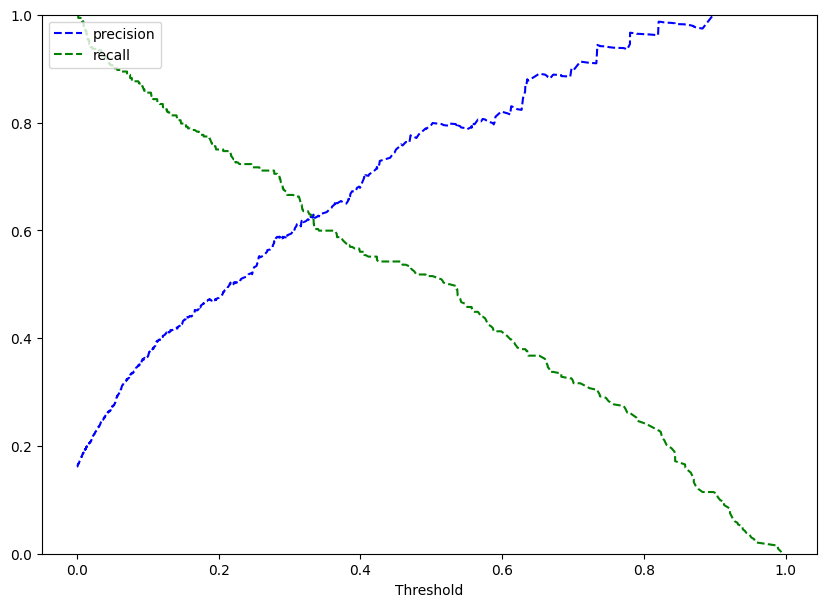

In [37]:
y_scores_lda = lda.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class

precisions_lda, recalls_lda, thresholds_lda = precision_recall_curve(y_train, y_scores_lda[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lda, precisions_lda[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lda, recalls_lda[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observation:**

- We can see that the precision and the recall are balanced for a threshold of about ~0.35.

**Let's check the model performance at this threshold**

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1726
           1       0.63      0.60      0.62       332

    accuracy                           0.88      2058
   macro avg       0.78      0.77      0.77      2058
weighted avg       0.88      0.88      0.88      2058



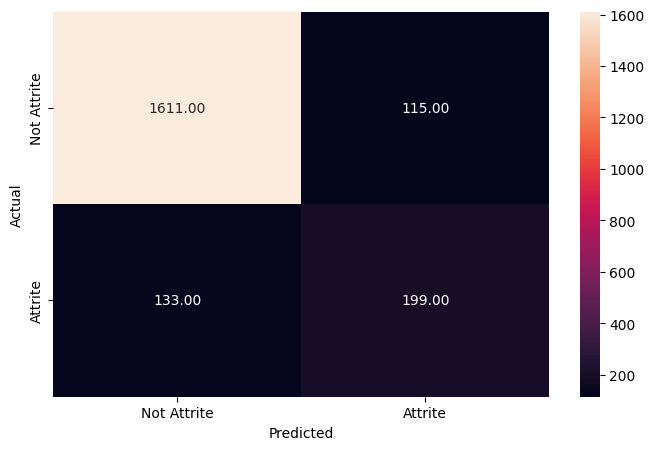

In [38]:
optimal_threshold1 = .35

y_pred_train_lda = lda.predict_proba(x_train)

metrics_score(y_train, y_pred_train_lda[:,1] > optimal_threshold1)

**Observations:**

- The precision has dropped but **the recall for class 1 has increased to 0.60**; the class and metric of interest here.
- **The model is able to identify the majority of employees who are at risk of attrition,** and would hence be a more useful model than the previous iteration with the default threshold.

Let's check the model performance on the test data

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       740
           1       0.63      0.61      0.62       142

    accuracy                           0.88       882
   macro avg       0.78      0.77      0.78       882
weighted avg       0.88      0.88      0.88       882



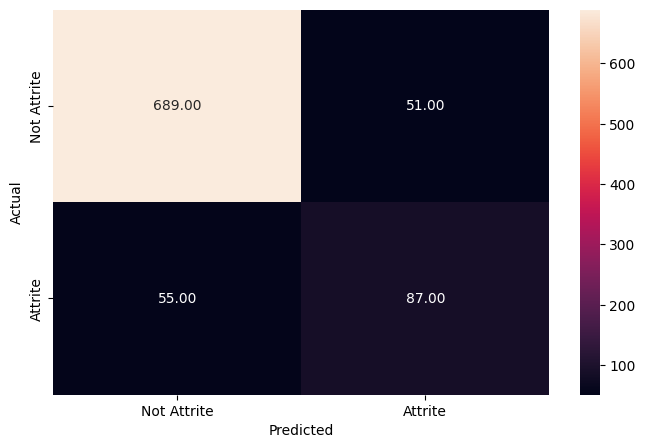

In [39]:
# Checking performance on the test data
optimal_threshold1 = .35

y_pred_test_lda = lda.predict_proba(x_test)

metrics_score(y_test, y_pred_test_lda[:,1] > optimal_threshold1)

**Observations:**

- The model is giving a **similar performance on the test and the train data**, meaning the model has generalized well.
- **The average recall and the precision for the model are good**, but let's see if we can get a better performance using other algorithms. 

### **Quadratic Discriminant Analysis**

Quadratic discriminant analysis (QDA) is a probabilistic parametric classification technique that represents an evolution of LDA for nonlinear class separations. QDA, like LDA, is based on the hypothesis that the probability density distributions are multivariate normal but, in this case, the dispersion is not the same for all of the categories.

In [40]:
# Fitting QDA model
qda = QuadraticDiscriminantAnalysis()

qda.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       1.00      0.13      0.23      1726
           1       0.18      1.00      0.31       332

    accuracy                           0.27      2058
   macro avg       0.59      0.56      0.27      2058
weighted avg       0.87      0.27      0.24      2058



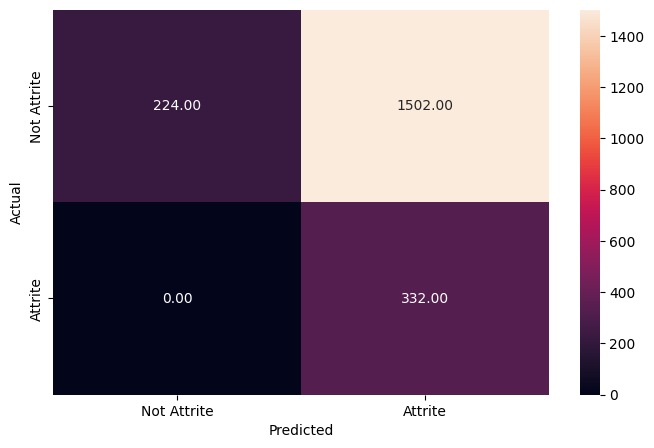

In [41]:
# Checking model performance on the training data
y_pred_train_qda = qda.predict(x_train)

metrics_score(y_train, y_pred_train_qda)

              precision    recall  f1-score   support

           0       0.96      0.14      0.24       740
           1       0.18      0.97      0.30       142

    accuracy                           0.27       882
   macro avg       0.57      0.55      0.27       882
weighted avg       0.84      0.27      0.25       882



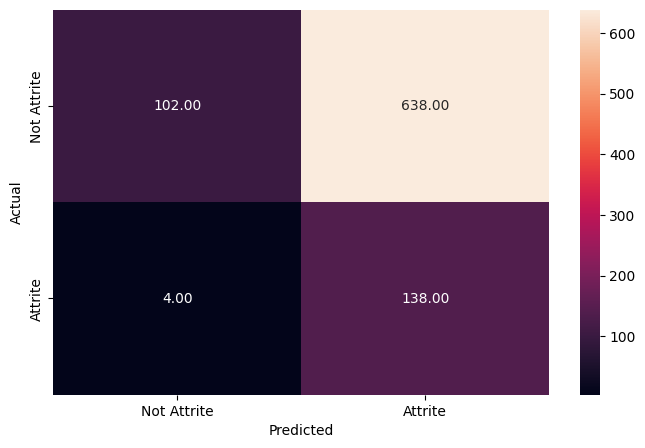

In [43]:
# Checking performance of the model on the test data
y_pred_test_qda = qda.predict(x_test)

metrics_score(y_test, y_pred_test_qda)

**Observations:**

- QDA gives a very high recall for class 1, but the recall for class 0 is very poor which makes the **overall recall and accuracy of the model very low**.
- **The model has a high number of false positives**, i.e., the model will predict that the employee would attrite even though he/she would not.
- This is not a good model and will not be able to help the company with their objective.